# Ejercicio 1

### Implementar el baseline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [23]:
train_x = pd.read_csv("./mnist/mnist_Xtrain.csv", header=None).to_numpy()
train_y = pd.read_csv("./mnist/mnist_Ytrain.csv", header=None).to_numpy()

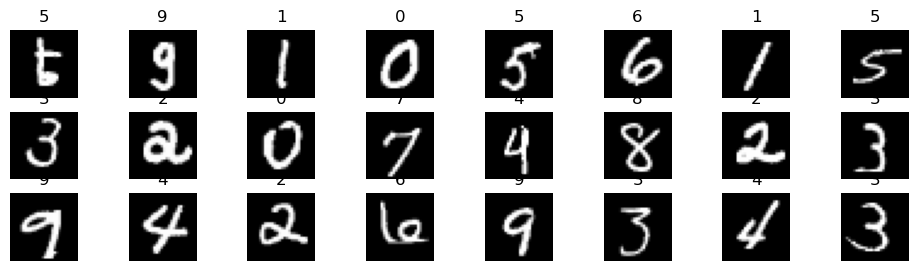

In [15]:
figure = plt.figure( figsize = (12,3) )
cols, rows = 8, 3

for i in range(1, cols * rows + 1):
    sample_idx = np.random.choice(len(train_y), 1)[0]
    img, label = train_x[sample_idx].reshape((28, 28)), train_y.squeeze()[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()
    

### Inciso a 

In [24]:
porcentaje_muestra = 0.9

In [25]:
# Obtenemos una cierta cantidad de elementos de los conjuntos de entrenamiento
n_muestras = int(len(train_x) * porcentaje_muestra)
X_train = train_x[:n_muestras]
Y_train = train_y[:n_muestras].squeeze()

In [26]:
# Generamos la matriz indicadora
y_k = np.eye(10)[Y_train]

In [27]:
# Utilizamos LinearRegression para ajustar a los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_k)

LinearRegression()

In [28]:
test_x = pd.read_csv("./mnist/mnist_Xtest.csv", header=None).to_numpy()
test_y = pd.read_csv("./mnist/mnist_Ytest.csv", header=None).to_numpy()

In [29]:
n_muestras_test = int(len(test_x) * porcentaje_muestra)
X_test = test_x[:n_muestras_test]
Y_test = test_y[:n_muestras_test].squeeze()

In [30]:
prediccion = model.predict(X_test)

In [31]:
y_pred = np.argmax(prediccion, axis=1)

Observamos con que precisión fue la clasificación, utilizando lo siguiente:

In [32]:
precision = precision_score(Y_test, y_pred, average=None)
print(precision)

[0.90200211 0.83432455 0.91421255 0.84930032 0.81378601 0.87794118
 0.87804878 0.85516507 0.84165652 0.83882353]


In [33]:
matriz_confusion = confusion_matrix(Y_test, y_pred)
print(matriz_confusion)

[[856   0   0   2   2   6  13   2   6   1]
 [  0 982   2   2   3   2   5   1  15   0]
 [ 17  51 714  21  13   0  38  20  37   7]
 [  4  16  21 789   5  13   9  20  18   9]
 [  1  20   7   1 791   4  10   1  10  39]
 [ 21  19   3  67  24 597  18  14  37  14]
 [ 18   9   8   0  21  18 792   0   4   0]
 [  5  31  15   4  23   0   1 803   0  49]
 [ 13  40  10  27  25  39  15   9 691  18]
 [ 14   9   1  16  65   1   1  69   3 713]]


Observamos que tan bien clasifico , esto lo podemos observar de la siguiente

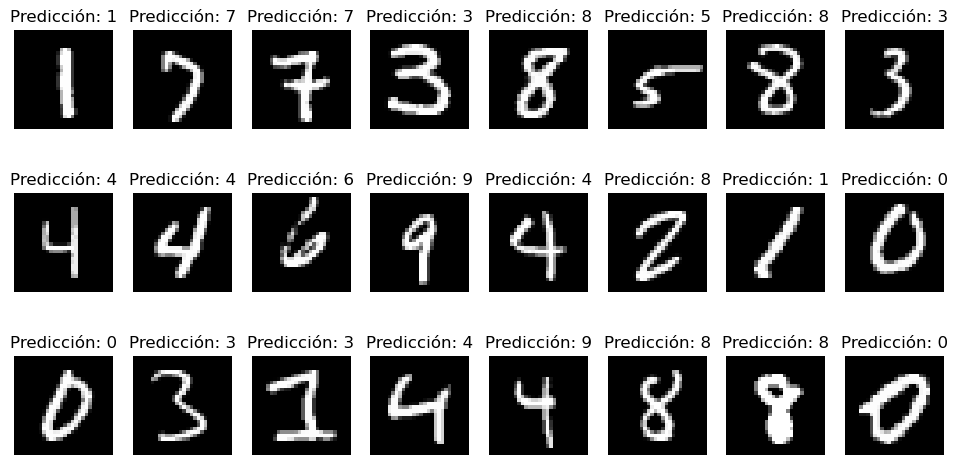

Porcentaje de aciertos: 87.5%


In [34]:
figure = plt.figure(figsize=(12, 6))
cols, rows = 8, 3
totalAciertos = 0

for i in range(1, cols * rows + 1):
    sample_idx = np.random.choice(len(Y_test), 1)[0]
    img, pred_label, true_label = X_test[sample_idx].reshape((28, 28)), y_pred.squeeze()[sample_idx], Y_test.squeeze()[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"Predicción: {pred_label}")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

    if pred_label == true_label:
        totalAciertos += 1

plt.show()

print(f"Porcentaje de aciertos: {round((totalAciertos * 100)/24, 2)}%")

### Inciso b 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import metrics

In [5]:
train_x = pd.read_csv("./mnist/mnist_Xtrain.csv", header=None).to_numpy()
train_y = pd.read_csv("./mnist/mnist_Ytrain.csv", header=None).to_numpy()
test_x = pd.read_csv("./mnist/mnist_Xtest.csv", header=None).to_numpy()
test_y = pd.read_csv("./mnist/mnist_Ytest.csv", header=None).to_numpy()

In [37]:
porcentaje_muestra = 0.9

In [38]:
# Obtenemos una cierta cantidad de elementos de los conjuntos de entrenamiento
n_muestras = int(len(train_x) * porcentaje_muestra)
X_train = train_x[:n_muestras]
Y_train = train_y[:n_muestras].squeeze()

n_muestras_test = int(len(test_x) * porcentaje_muestra)
X_test = test_x[:n_muestras_test]
Y_test = test_y[:n_muestras_test].squeeze()

In [39]:
# Análisis Discriminante Lineal (LDA)
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=False)
lda.fit(X_train, Y_train)
y_hat_lda = lda.predict(X_test)
print("Resultados de LDA:")
print(metrics.classification_report(Y_test, y_hat_lda))

Resultados de LDA:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       888
           1       0.89      0.96      0.92      1012
           2       0.91      0.79      0.85       918
           3       0.87      0.88      0.87       904
           4       0.84      0.91      0.87       884
           5       0.84      0.82      0.83       814
           6       0.91      0.90      0.91       870
           7       0.92      0.84      0.88       931
           8       0.80      0.81      0.80       887
           9       0.81      0.86      0.84       892

    accuracy                           0.87      9000
   macro avg       0.87      0.87      0.87      9000
weighted avg       0.87      0.87      0.87      9000



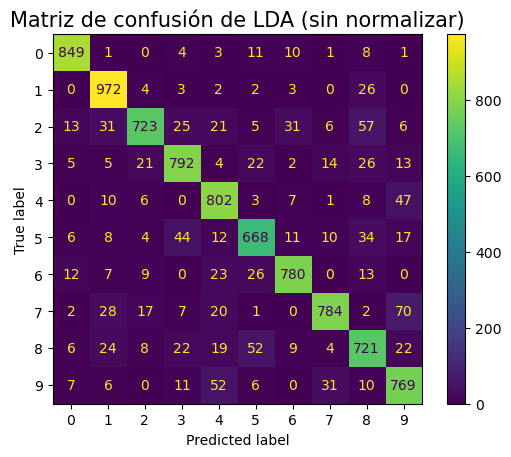

In [40]:
# Visualizar matriz de confusión no normalizada para LDA
disp_lda = metrics.ConfusionMatrixDisplay.from_estimator(lda, X_test, Y_test, normalize=None)
disp_lda.ax_.set_title('Matriz de confusión de LDA (sin normalizar)', {'fontsize': 15})
plt.show()

In [41]:
# Análisis Discriminante Cuadrático (QDA)
qda = QuadraticDiscriminantAnalysis(store_covariance=False)
qda.fit(X_train, Y_train)
y_hat_qda = qda.predict(X_test)
print("Resultados de QDA:")
print(metrics.classification_report(Y_test, y_hat_qda))

/Users/lucianoandresjuarezlopez/anaconda3/envs/CienciaDeDatos/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Resultados de QDA:
              precision    recall  f1-score   support

           0       0.39      0.96      0.56       888
           1       0.90      0.95      0.92      1012
           2       0.89      0.24      0.38       918
           3       0.71      0.42      0.53       904
           4       0.95      0.21      0.35       884
           5       0.87      0.17      0.28       814
           6       0.62      0.96      0.76       870
           7       0.93      0.36      0.52       931
           8       0.47      0.61      0.53       887
           9       0.48      0.94      0.63       892

    accuracy                           0.59      9000
   macro avg       0.72      0.58      0.55      9000
weighted avg       0.72      0.59      0.55      9000



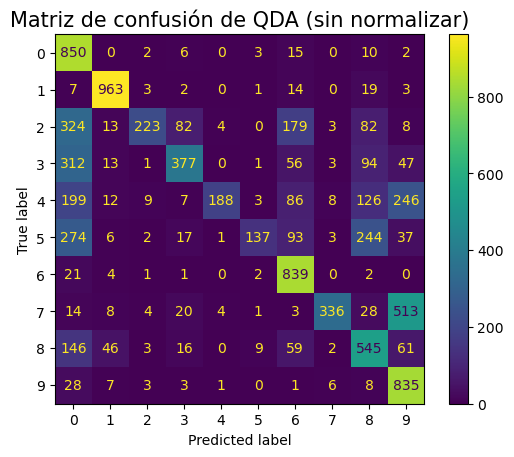

In [42]:
# Visualizar matriz de confusión no normalizada para QDA
disp_qda = metrics.ConfusionMatrixDisplay.from_estimator(qda, X_test, Y_test, normalize=None)
disp_qda.ax_.set_title('Matriz de confusión de QDA (sin normalizar)', {'fontsize': 15})
plt.show()

## Applet

In [3]:
from tkinter import Canvas, Tk, Button, Label
from PIL import Image, ImageDraw
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import random
import io
import cv2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [4]:
# Variables globales para el dibujo
x1_prev, y1_prev, x2_prev, y2_prev = None, None, None, None
line_width = 3
line_color = "black"
bg_color = "white"  # Cambiado a negro para el fondo del canvas

model = None
lda = None
qda = None

In [5]:
def draw(event):
    global x1_prev, y1_prev, x2_prev, y2_prev

    if x1_prev is None and y1_prev is None:
        x1_prev, y1_prev = event.x, event.y

    if x2_prev is None and y2_prev is None:
        x2_prev, y2_prev = event.x, event.y

    if x1_prev is not None and y1_prev is not None and x2_prev is not None and y2_prev is not None:
        canvas.create_line(x1_prev, y1_prev, x2_prev, y2_prev, width=line_width, fill=line_color, capstyle='round', smooth='true')
        x1_prev, y1_prev, x2_prev, y2_prev = None, None, None, None

In [6]:
def clear_canvas():
    canvas.delete("all")
    # Reiniciar las variables globales
    global x1_prev, y1_prev, x2_prev, y2_prev
    x1_prev, y1_prev, x2_prev, y2_prev = None, None, None, None

In [18]:
def recognize_number():
    global model
    global lda
    global qda

    # Obtener el PostScript del canvas
    ps = canvas.postscript(colormode='mono')

    # Convertir el PostScript en una imagen
    img = Image.open(io.BytesIO(ps.encode('utf-8')))

    # Convertir la imagen en escala de grises
    img = img.convert("L")

    # Redimensionar la imagen a 28x28 (opcional, si el canvas no tiene estas dimensiones)
    img = img.resize((28, 28))

    # Convertir la imagen a una matriz NumPy
    img_array = np.array(img)

    # Invertir los colores de la imagen
    img_array = cv2.bitwise_not(img_array)

    # Normalizar los valores de píxeles
    img_array_normalized = img_array.astype('float32') / 255.0

    # Aplicar la transformación de escala a la imagen
    # img_array_scaled = scaler.transform(img_array_normalized)

    porcentaje_muestra = 0.9
    train_x = pd.read_csv("./mnist/mnist_Xtrain.csv", header=None).to_numpy()
    train_y = pd.read_csv("./mnist/mnist_Ytrain.csv", header=None).to_numpy()
    
    n_muestras = int(len(train_x) * porcentaje_muestra)
    X_train = train_x[:n_muestras]
    Y_train = train_y[:n_muestras].squeeze()

    y_k = np.eye(10)[Y_train]

    if model is None:
        model = LinearRegression()
        model.fit(X_train, y_k)

    if lda is None:
        lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=False)
        lda.fit(X_train, Y_train)

    if qda is None:
        qda = QuadraticDiscriminantAnalysis(store_covariance=False)
        qda.fit(X_train, Y_train)


    # vector de caracteristicas de la imagen
    X_number = [ img_array_normalized.flatten() ]
    
    # Realizar la predicción usando el modelo entrenado
    prediction = model.predict(X_number)
    prediction_qda = qda.predict(X_number)
    prediction_lda = lda.predict(X_number)
    
    # Mostrar la predicción en la consola
    prediction_label.config(text="Baseline: " + str(np.argmax(prediction)))
    prediction_label_lda.config(text="LDA: " + str( prediction_lda[0] ))
    prediction_label_qda.config(text="QDA: " + str(prediction_qda[0]))

In [20]:
root = Tk()
root.title("Reconocimiento de números")

canvas = Canvas(root, width=28, height=28, bg=bg_color)
canvas.pack()

button_recognize = Button(root, text="Reconocer número", command=recognize_number) #, state="disabled")
button_recognize.pack()

button_clear = Button(root, text="Limpiar", command=clear_canvas)
button_clear.pack()

# Etiqueta para mostrar la predicción
prediction_label = Label(root, text="Baseline: ")
prediction_label.pack()

prediction_label_lda = Label(root, text="LDA: ")
prediction_label_lda.pack()

prediction_label_qda = Label(root, text="QDA: ")
prediction_label_qda.pack()

canvas.bind("<B1-Motion>", draw)

root.mainloop()

# Ejercicio 2

In [1]:
import os
import pandas as pd
from datetime import datetime

# Directorio base donde se encuentran los archivos de las conferencias matutinas
base_dir = "conferencias_matutinas_amlo"

# Diccionario para almacenar las transcripciones del presidente por semana
president_transcriptions_by_week = {}

# Recorrer los años 2019 a 2023
for year in range(2019, 2024):
    year_dir = os.path.join(base_dir, str(year))
    if not os.path.exists(year_dir):
        continue
    
    # Recorrer los meses dentro de cada año
    for month_dir in os.listdir(year_dir):
        month_path = os.path.join(year_dir, month_dir)
        if not os.path.isdir(month_path):
            continue
        
        # Recorrer los días dentro de cada mes
        for day_dir in os.listdir(month_path):
            day_path = os.path.join(month_path, day_dir)
            if not os.path.isdir(day_path):
                continue
            
            # Encontrar el archivo CSV del presidente dentro de cada día
            president_csv_path = os.path.join(day_path, "csv_por_participante", "PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR.csv")
            if os.path.exists(president_csv_path):
                # Leer el archivo CSV
                df = pd.read_csv(president_csv_path)
                # Obtener el texto
                transcriptions = df['Texto'].str.cat(sep=' ')
                # Obtener la fecha del día
                date_str = f"{df['Anio'].iloc[0]}-{df['Mes'].iloc[0]}-{df['Dia'].iloc[0]}"
                date_obj = datetime.strptime(date_str, "%Y-%m-%d")
                # Obtener el número de semana en el año
                week_number = date_obj.isocalendar()[1]
                # Agrupar por número de semana
                week_key = f"{year}-Week-{week_number}"
                # Agregar las transcripciones al diccionario por semana
                if week_key in president_transcriptions_by_week:
                    president_transcriptions_by_week[week_key] += transcriptions
                else:
                    president_transcriptions_by_week[week_key] = transcriptions


In [27]:
# Calcular el total de palabras por semana
total_words_by_week = {week_key: len(transcriptions.split()) for week_key, transcriptions in president_transcriptions_by_week.items()}

# Calcular el promedio de palabras por semana
total_weeks = len(total_words_by_week)
total_words = sum(total_words_by_week.values())
average_words_per_week = total_words / total_weeks

print("Promedio de palabras por semana:", round(average_words_per_week, 0))

Promedio de palabras por semana: 25981.0


In [28]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Definimos la lista de stop words
stop_words = set(stopwords.words('spanish'))  # Usamos el conjunto para una búsqueda más eficiente

# Calcular el total de pstop words por semana
total_stop_words_by_week = {}
for week_key, transcriptions in president_transcriptions_by_week.items():
    # Tokenizar las palabras
    words = word_tokenize(transcriptions, language='spanish')
    # Contar las stop words en esta semana
    stop_words_count = sum(1 for word in words if word.lower() in stop_words)
    total_stop_words_by_week[week_key] = stop_words_count

# Calcular el promedio de stop words por semana
total_stop_words = sum(total_stop_words_by_week.values())
average_stop_words_per_week = total_stop_words / total_weeks

print("Promedio de 'stop words' por semana:", round(average_stop_words_per_week, 0))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucianoandresjuarezlopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Promedio de 'stop words' por semana: 14113.0


## Inciso a

In [29]:
from my_functions import *

In [30]:
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, 
                                _remueveStop=True, _stemming=False, _lematiza=False, _removerPuntuacion=True)

In [31]:
# Aplicar el preprocesamiento a las transcripciones
preprocessed_transcriptions = [preprocesador.preprocesa(text_week) for text_week in president_transcriptions_by_week.values()]

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
# Definir el tamaño del vocabulario deseado
max_vocab_size = 500
# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=max_vocab_size)

In [52]:
# Obtener la representación TF-IDF de los textos preprocesados
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_transcriptions)

In [53]:
# Convertir la matriz TF-IDF a un DataFrame de pandas
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Visualizar el DataFrame
print(tfidf_df)

        abajo    acerca    actuar   acuerdo  adelante    ademas   adultos  \
0    0.011073  0.029756  0.007930  0.039195  0.015739  0.047035  0.005912   
1    0.016514  0.021516  0.013140  0.090928  0.039119  0.064949  0.014696   
2    0.004787  0.021049  0.022854  0.128773  0.022679  0.033888  0.015335   
3    0.000000  0.005719  0.011177  0.093916  0.027729  0.060769  0.000000   
4    0.010278  0.017575  0.024535  0.097013  0.029216  0.050932  0.005488   
..        ...       ...       ...       ...       ...       ...       ...   
254  0.003569  0.003487  0.006815  0.043789  0.020288  0.047157  0.026675   
255  0.006960  0.003400  0.026583  0.039417  0.046163  0.059125  0.007432   
256  0.012725  0.005329  0.001736  0.065202  0.036171  0.070349  0.003882   
257  0.011885  0.009678  0.011349  0.043006  0.043171  0.059834  0.000000   
258  0.022225  0.009872  0.000000  0.045772  0.047863  0.070565  0.025892   

     adversarios  aeropuerto  afortunadamente  ...       ver  veracruz  \
0

## Inciso b

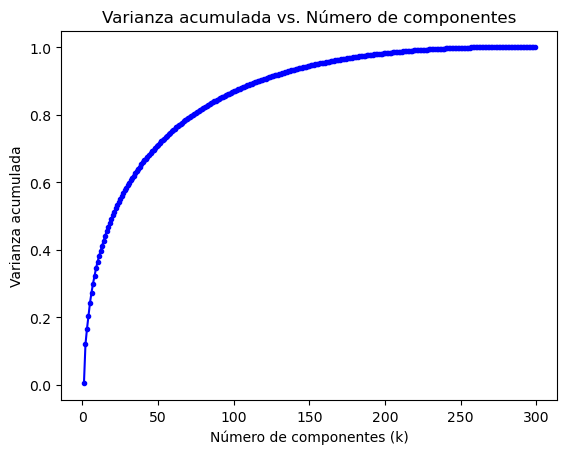

In [104]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

# Almacenar la varianza explicada acumulada
cumulative_explained_variance = []

# Almacenar la varianza explicada
explained_variance = []

# Rango de valores de k que deseas probar
k_values = range(1, 300)

# Calcular la varianza explicada para cada valor de k
for k in k_values:
    svd = TruncatedSVD(n_components=k)
    svd.fit(tfidf_matrix)
    explained_variance_ratio = svd.explained_variance_ratio_
    explained_variance.append(np.sum(explained_variance_ratio))
    cumulative_explained_variance.append(np.sum(explained_variance_ratio))

# Graficar la varianza explicada acumulada en función de k
plt.plot(k_values, cumulative_explained_variance, 'b.-')
plt.xlabel('Número de componentes (k)')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada vs. Número de componentes')
plt.show()


In [143]:
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [157]:
# Realizar la descomposición SVD
k = 20
svd = TruncatedSVD(n_components=k)  # Seleccionar un valor inicial de k, puedes ajustarlo según lo necesites
svd.fit(tfidf_matrix)

TruncatedSVD(n_components=20)

In [158]:
# Obtenemos la matriz U, Sigma y V transpuesta
U = svd.transform(tfidf_matrix)
Sigma = svd.singular_values_
Vt = svd.components_

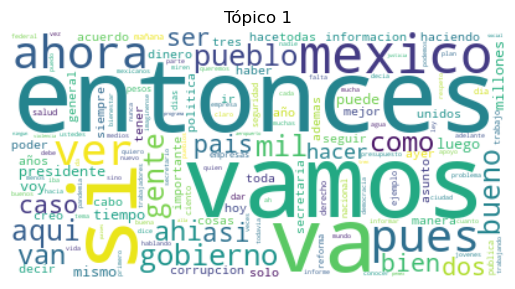

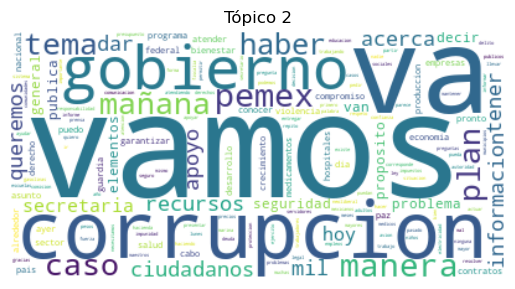

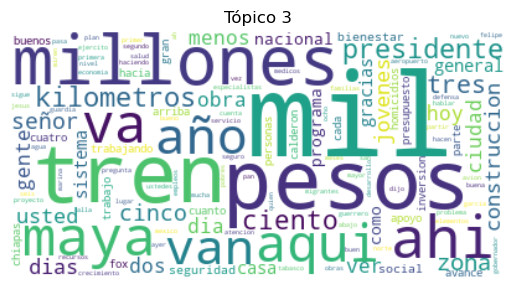

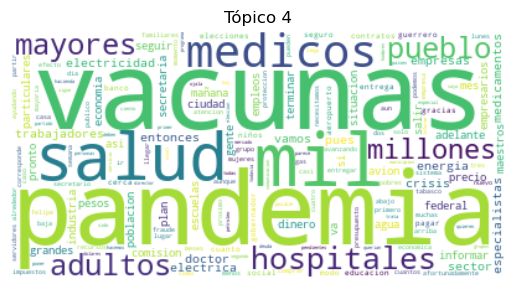

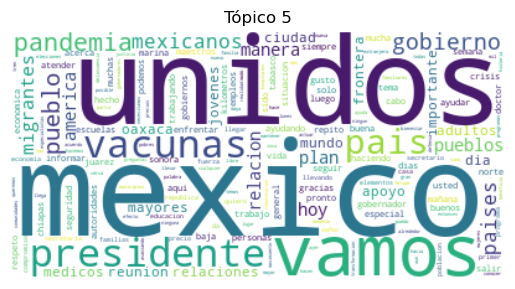

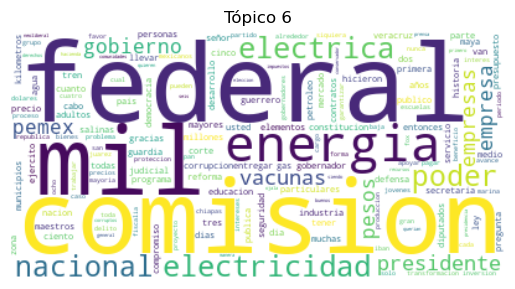

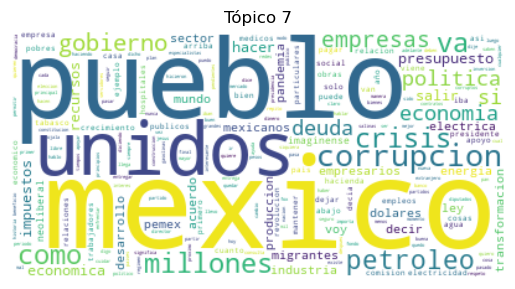

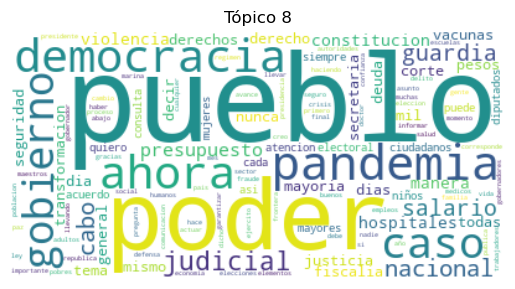

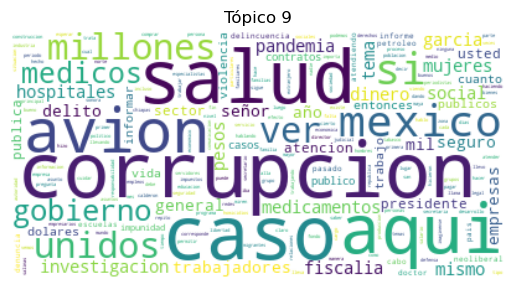

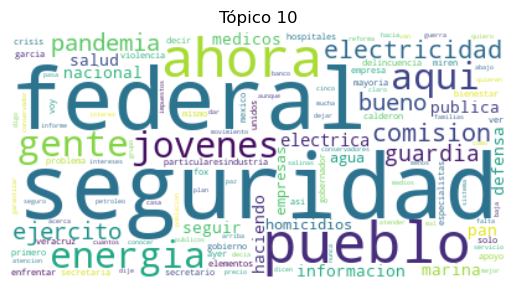

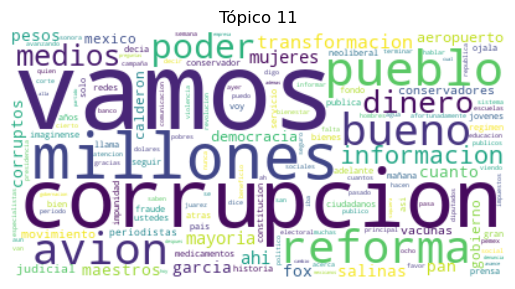

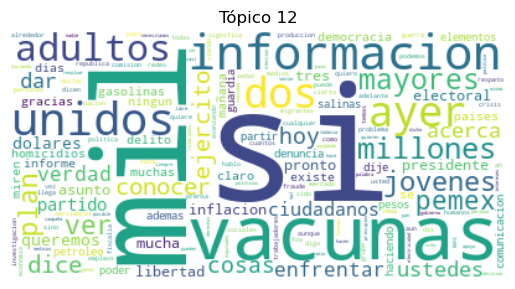

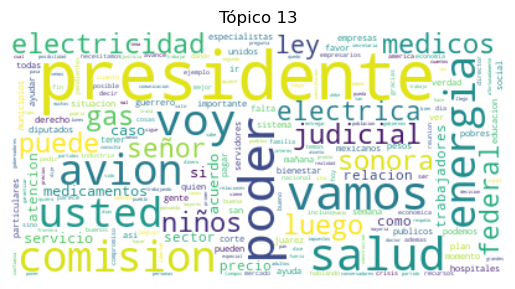

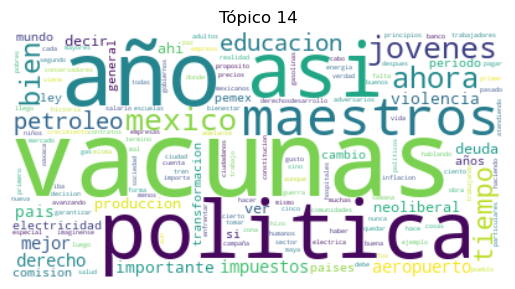

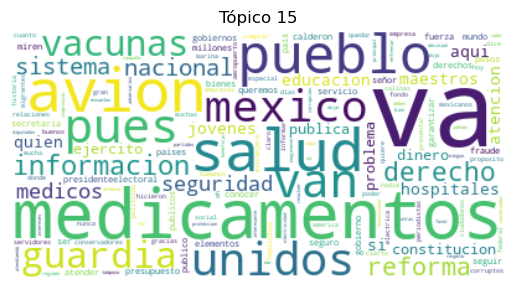

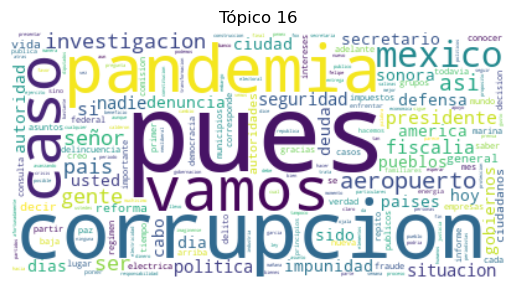

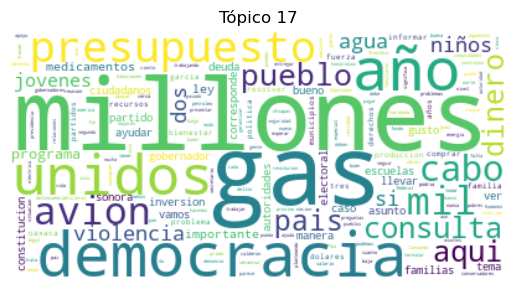

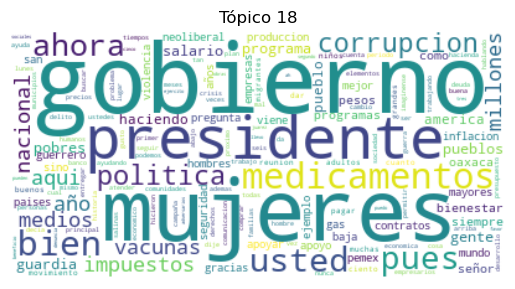

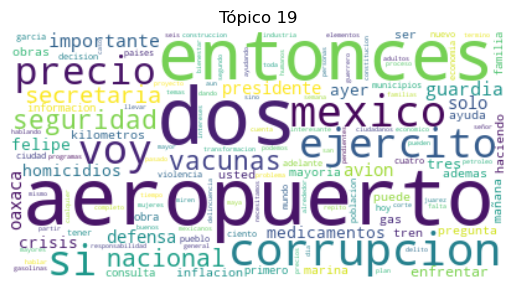

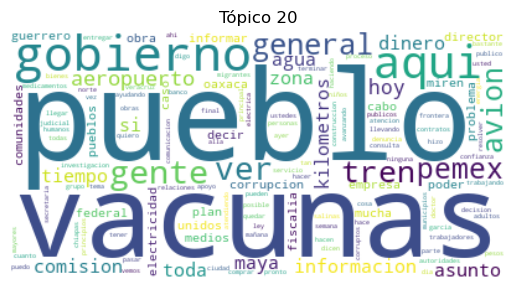

In [159]:
# Representar cada tópico mediante un word cloud
num_topics = len(Vt)
for topic_index in range(num_topics):
    # Obtener los términos más importantes para el tópico actual (basado en los valores en Vt)
    topic_weights = Vt[topic_index]
    topic_weights = topic_weights / topic_weights.max()  # Normalizar los pesos para asegurar que estén en el rango [0, 1]
    topic_terms = tfidf_vectorizer.get_feature_names_out()
    topic_dict = {term: weight for term, weight in zip(topic_terms, topic_weights)}

    # Crear el word cloud
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(topic_dict)

    # Mostrar el word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Tópico {topic_index + 1}")
    plt.axis("off")

plt.show()

## Inciso c

In [148]:
# Matriz documento-tópico mediante el método transform
document_topic = svd.transform(tfidf_matrix)

In [149]:
# Asignar cada conferencia a su tópico correspondiente usando el valor máximo de cada fila
assigned_topics = np.argmax(document_topic, axis=1)

In [150]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [151]:
# Visualización de baja dimensión usando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(document_topic)

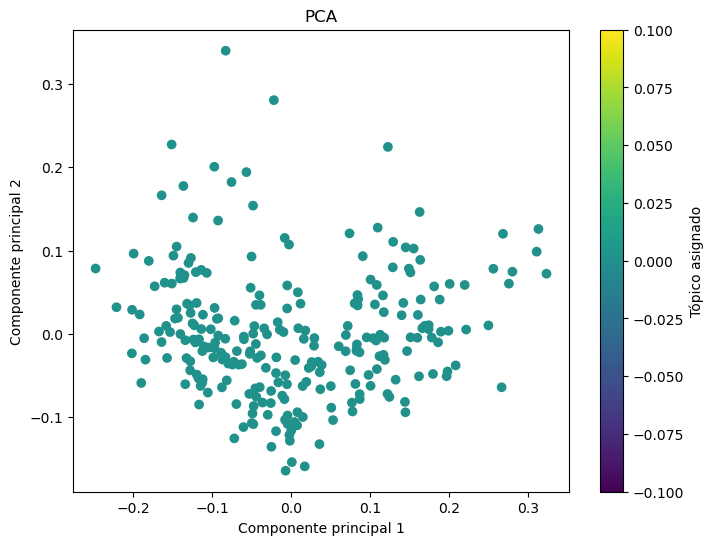

In [152]:
# Visualización de resultados de PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=assigned_topics, cmap='viridis')
plt.title('PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Tópico asignado')
plt.show()

In [153]:
# Visualización de baja dimensión usando Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kernel_pca_result = kernel_pca.fit_transform(document_topic)

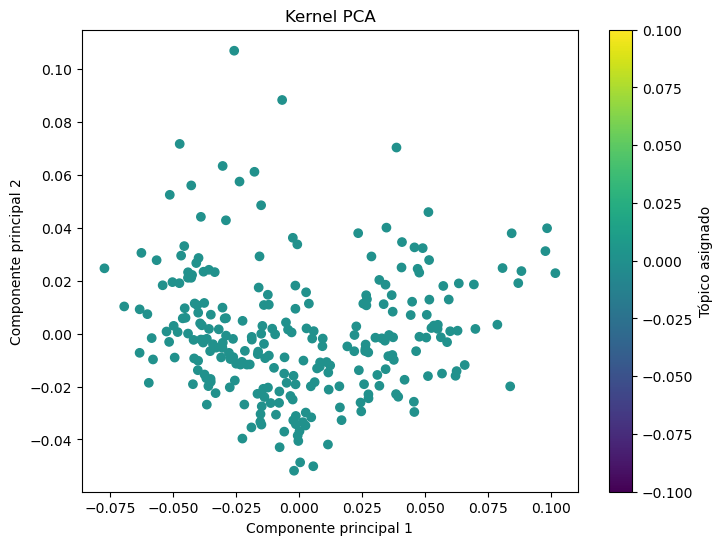

In [154]:
# Visualización de resultados de Kernel PCA
plt.figure(figsize=(8, 6))
plt.scatter(kernel_pca_result[:, 0], kernel_pca_result[:, 1], c=assigned_topics, cmap='viridis')
plt.title('Kernel PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Tópico asignado')
plt.show()

In [155]:
# Visualización de baja dimensión usando t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(document_topic)

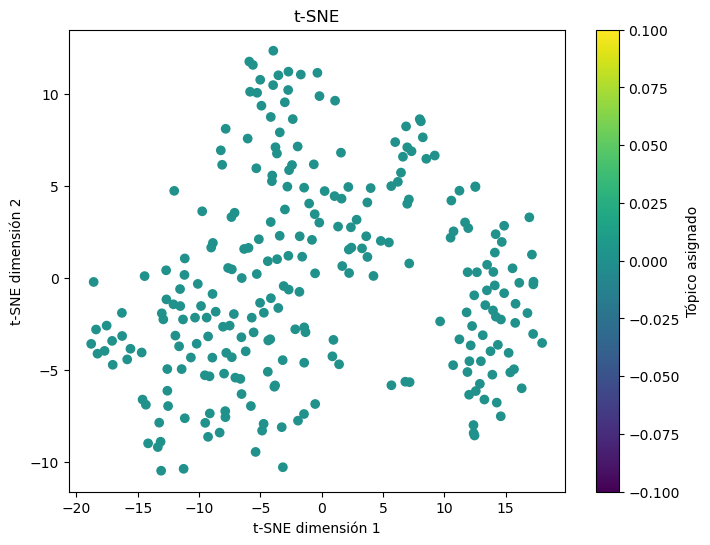

In [156]:
# Visualización de resultados de t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=assigned_topics, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('t-SNE dimensión 1')
plt.ylabel('t-SNE dimensión 2')
plt.colorbar(label='Tópico asignado')
plt.show()

### Inciso d

In [161]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

In [163]:
# Realizar la descomposición NMF
k = 20
nmf = NMF(n_components=k, init='random', random_state=0, max_iter=1000)
W = nmf.fit_transform(tfidf_matrix)
H = nmf.components_

/Users/lucianoandresjuarezlopez/anaconda3/envs/CienciaDeDatos/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


In [167]:
# Matriz documento-tópico mediante la matriz W obtenida
document_topic_nmf = W

# Asignar cada conferencia a su tópico correspondiente usando el valor máximo de cada fila
assigned_topics_nmf = np.argmax(document_topic_nmf, axis=1)

In [168]:
# Visualización de baja dimensión usando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(document_topic_nmf)

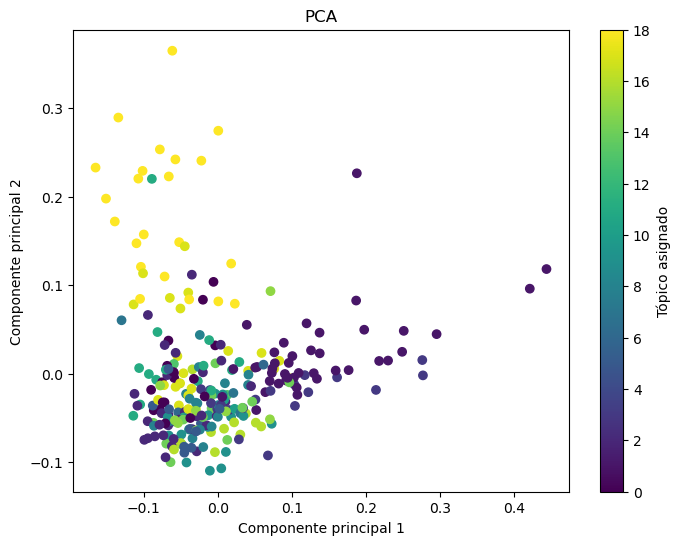

In [169]:
# Visualización de resultados de PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=assigned_topics_nmf, cmap='viridis')
plt.title('PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Tópico asignado')
plt.show()

In [170]:
# Visualización de baja dimensión usando Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kernel_pca_result = kernel_pca.fit_transform(document_topic_nmf)

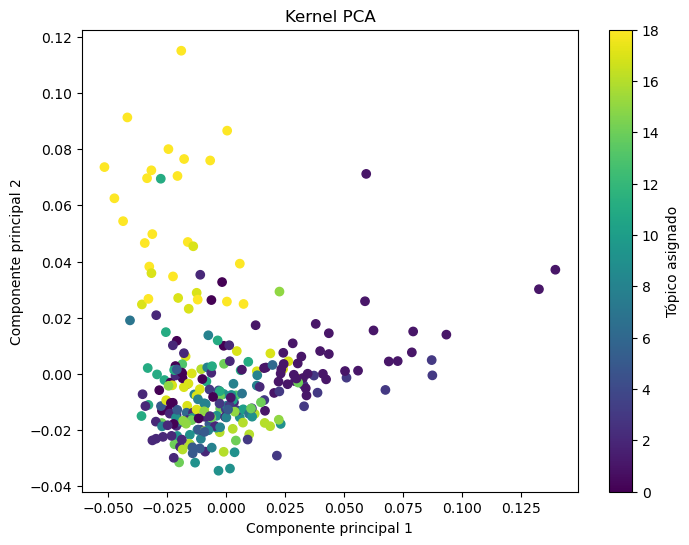

In [171]:
# Visualización de resultados de Kernel PCA
plt.figure(figsize=(8, 6))
plt.scatter(kernel_pca_result[:, 0], kernel_pca_result[:, 1], c=assigned_topics_nmf, cmap='viridis')
plt.title('Kernel PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Tópico asignado')
plt.show()

In [172]:
# Visualización de baja dimensión usando t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(document_topic_nmf)

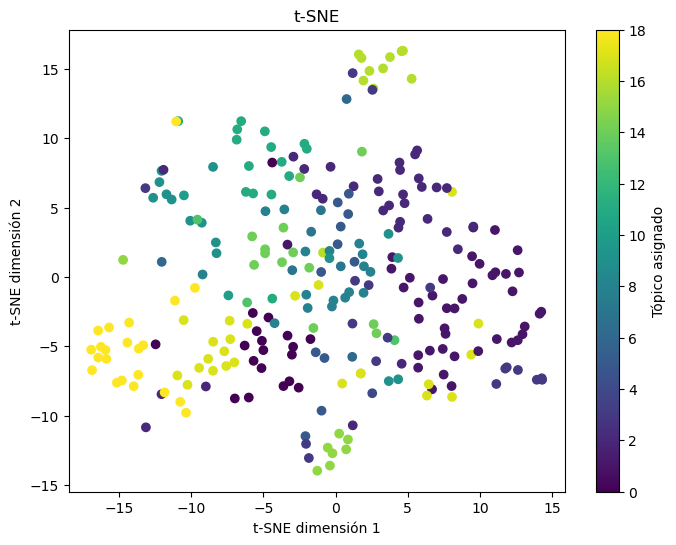

In [173]:
# Visualización de resultados de t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=assigned_topics_nmf, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('t-SNE dimensión 1')
plt.ylabel('t-SNE dimensión 2')
plt.colorbar(label='Tópico asignado')
plt.show()